# ALY6110 - Data Management and Big Data
## Module 4 Final Project
### Professor Olesya Agafontseva
### 11th June 2025
### Group 6: Payal Sharma, Min Zeng, Hang Chen,Yuhong Tao


## 📄 Dataset Overview: Bank Transactions Dataset

This dataset contains customer transaction details from a banking system. It includes demographic information, transaction timestamps, account balances, and transaction amounts. The dataset is useful for customer segmentation, clustering, and behavior analysis.

### 📋 Variable Description

| Column Name                | Data Type     | Description                                                              |
|---------------------------|---------------|--------------------------------------------------------------------------|
| `TransactionID`           | object (str)  | Unique ID assigned to each transaction.                                  |
| `CustomerID`              | object (str)  | Unique ID assigned to each customer.                                     |
| `CustomerDOB`             | object (date) | Date of birth in `DD/MM/YY` format. Can be used to derive customer age.  |
| `CustGender`              | object (str)  | Customer gender (`M` = Male, `F` = Female).                              |
| `CustLocation`            | object (str)  | Customer’s city/location.                                                |
| `CustAccountBalance`      | float         | Current balance of the customer’s bank account (in INR).                 |
| `TransactionDate`         | object (date) | Date of transaction in `DD/MM/YY` format.                                |
| `TransactionTime`         | int           | Time of transaction in HHMMSS format (e.g., 143207 = 14:32:07).          |
| `TransactionAmount (INR)` | float         | Amount of the transaction in Indian Rupees (INR).                        |

### 📝 Notes:
- You can derive `Age` from `CustomerDOB`.
- `TransactionTime` can be converted into `Hour`, `Minute`, or time ranges for time-series analysis.
- Consider encoding `CustGender` and `CustLocation` for modeling tasks.
- Recommended checks include missing values and outlier detection for `TransactionAmount` and `CustAccountBalance`.



In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [200]:
df = pd.read_csv('bank_transactions.csv')  # Update this path if needed
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### 1. Descriptive Statistics

In [202]:
# Summary statistics for numeric columns
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


### 2. Check for Missing Values

In [204]:
# Check for missing values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

### 3. Visualize Age and Gender Distribution

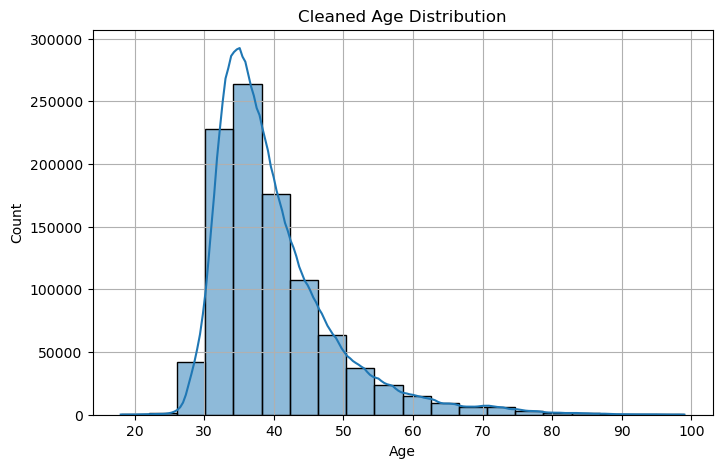

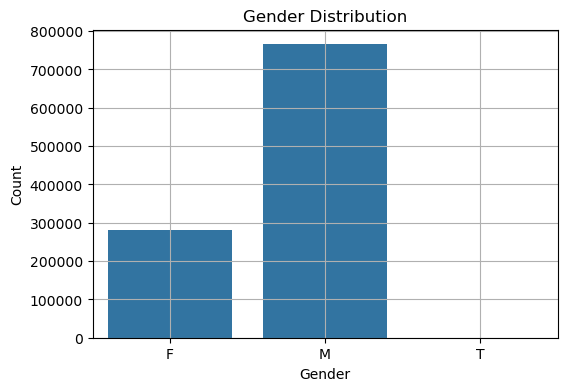

In [207]:
# Correct DOB parsing with a cutoff date to fix century interpretation
def parse_dob(date_str):
    try:
        parsed_date = pd.to_datetime(date_str, format='%d/%m/%y')
        if parsed_date.year > 2025:
            parsed_date = parsed_date.replace(year=parsed_date.year - 100)
        return parsed_date
    except:
        return pd.NaT

# Apply the corrected DOB parsing function
df['CustomerDOB'] = df['CustomerDOB'].apply(parse_dob)

# Recalculate age accurately
df['Age'] = 2025 - df['CustomerDOB'].dt.year

# Remove unrealistic ages (negative and >100)
df_clean = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Visualize cleaned age distribution clearly
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Age'].dropna(), bins=20, kde=True)
plt.title('Cleaned Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### 4. Explore Relationship: Transaction Amount vs Account Balance

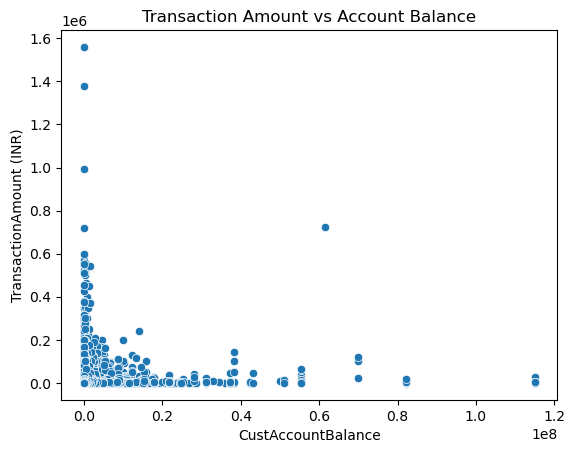

In [211]:
# Scatter plot
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)')
plt.title('Transaction Amount vs Account Balance')
plt.show()

### 🔷 1. Correlation Analysis

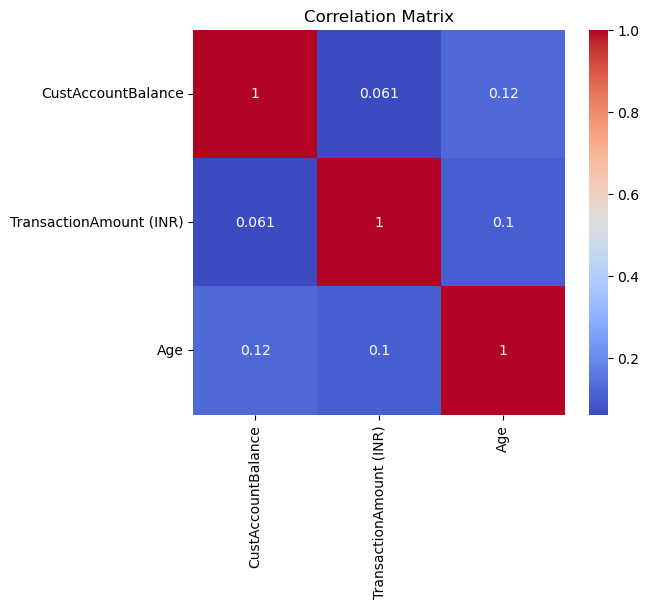

In [214]:
# Select numerical features for correlation
corr_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
corr_df = df[corr_features].dropna()

# Correlation Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


🔷 2. KMeans Clustering

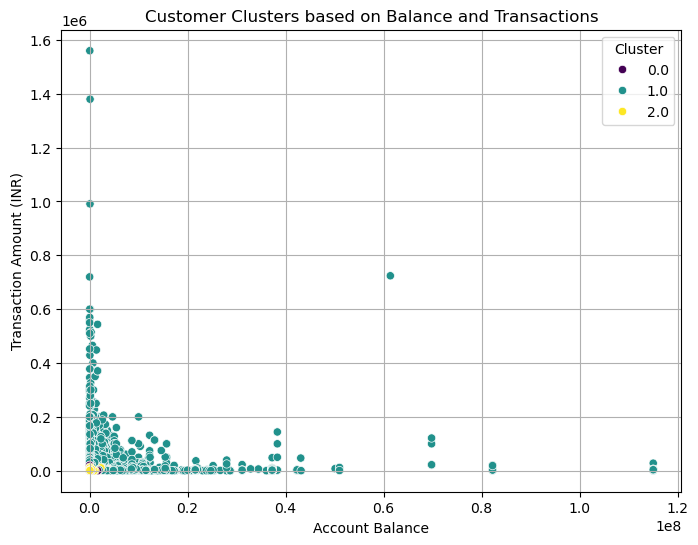

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure consistent data
cluster_data = df[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']].dropna()

# Scale data consistently
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Fit KMeans with fixed random state
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[cluster_data.index, 'Cluster'] = kmeans.fit_predict(cluster_scaled)

# Plot consistently
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x='CustAccountBalance', 
                y='TransactionAmount (INR)', 
                hue='Cluster', 
                palette='viridis')
plt.title('Customer Clusters based on Balance and Transactions')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.show()


### 🔷 3. Pattern Identification (by Cluster)

In [219]:
# Grouped cluster summary
cluster_summary = df.groupby('Cluster')[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']].mean().round(2)
print(cluster_summary)


         CustAccountBalance  TransactionAmount (INR)    Age
Cluster                                                    
0.0                48316.17                   894.26  35.05
1.0               800759.36                  9307.80  63.34
2.0               109520.66                  1296.40  46.43


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is already loaded in your notebook

# 1. Boxplot of Transaction Amount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CustGender', y='TransactionAmount (INR)', palette=['tomato'])
plt.yscale('log')
plt.title('Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (log10)')
plt.show()

# 2. Violin Plot of Account Balance by Age Group
# First create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 25, 35, 50, 65, 100],
                        labels=['18-25', '26-35', '36-50', '51-65', '66+'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AgeGroup', y='CustAccountBalance', palette=['skyblue'])
plt.yscale('log')
plt.title('Account Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Account Balance (log10)')
plt.show()

# 3. Density Plot of Transaction Amount by Age Group
plt.figure(figsize=(10, 6))
for age_group in df['AgeGroup'].cat.categories:
    subset = df[df['AgeGroup'] == age_group]
    sns.kdeplot(np.log10(subset['TransactionAmount (INR)']),
                label=age_group, alpha=0.5)
plt.title('Transaction Amount Distribution by Age Group')
plt.xlabel('Transaction Amount (log10)')
plt.ylabel('Density')
plt.legend(title='Age Group')
plt.show()

# 4. Calculate the total transaction volume (or the number of transactions) for each location
location_counts = df['CustLocation'].value_counts().head(10).index  # first 10

top_df = df[df['CustLocation'].isin(location_counts)]

avg_trans = top_df.groupby(['CustLocation', 'CustGender'])['TransactionAmount (INR)'].mean().reset_index()
avg_trans_pivot = avg_trans.pivot(index='CustLocation', columns='CustGender', values='TransactionAmount (INR)').fillna(0)

avg_trans_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Avg Transaction Amount by Gender (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Avg Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# 5. Density of Transaction vs. Account Balance
plt.figure(figsize=(8, 6))
plt.hexbin(
    x=np.log10(df['CustAccountBalance'] + 1),
    y=np.log10(df['TransactionAmount (INR)'] + 1),
    gridsize=40,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Count')
plt.xlabel('log10(Account Balance)')
plt.ylabel('log10(Transaction Amount)')
plt.title('Density of Transaction vs. Account Balance')
plt.tight_layout()
plt.show()


In [ ]:


import networkx as nx
import pandas as pd

# Load your data
df = pd.read_csv("bank_transactions.csv")

# Create an empty graph
G = nx.Graph()

# Add nodes (customers)
for customer in df['CustomerID'].unique():
    G.add_node(customer)

# Add edges between customers from the same location
location_groups = df.groupby('CustLocation')
for _, group in location_groups:
    customers = group['CustomerID'].unique()
    for i in range(len(customers)):
        for j in range(i + 1, len(customers)):
            G.add_edge(customers[i], customers[j])

# Analyze
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


